# Example Fashion MNIST

## (i) Import libraries

In [2]:
import sys
sys.path.append('../')
import matplotlib
import matplotlib.pyplot as plt
import visualization

## (ii) Plot classification accuracy
The dotted lines correspond to the epoch number at which the refinement phase started. 

['/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/fashion_mnist/mbv2light/run0_width_0.5/checkpoints/records.pkl']
['/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/fashion_mnist/mbv2light/run0_width_0.5/checkpoints/model.pth']


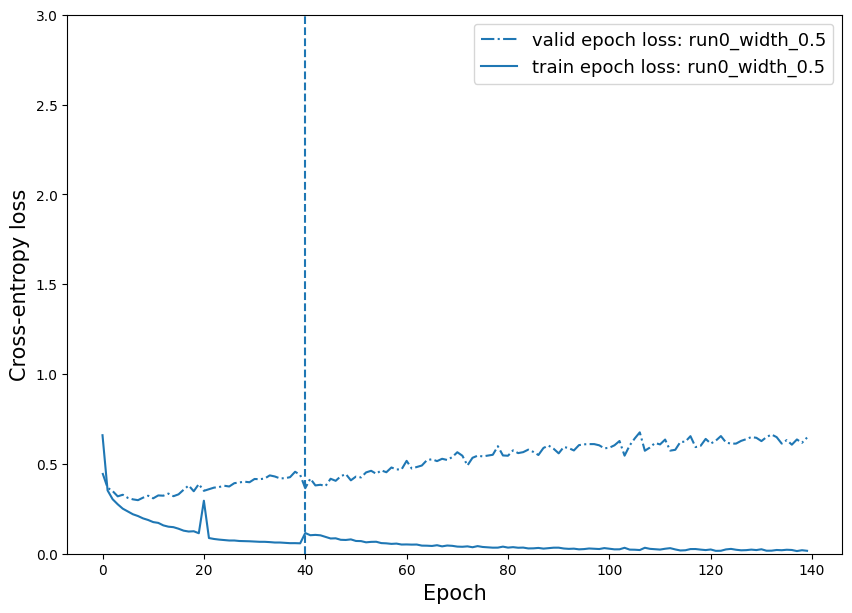

run0_width_0.5: test accuracy = 89.43000030517578


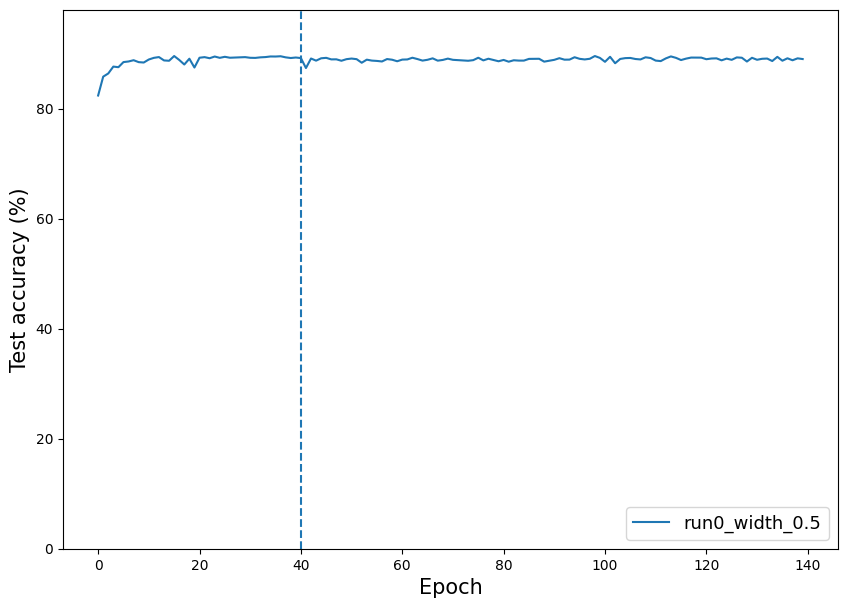

In [3]:
%matplotlib inline

exp_dir = '/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/fashion_mnist/mbv2light/'
models_list = ["run0_width_0.5"]

records_file_list = [exp_dir + model_name + '/checkpoints/records.pkl' for model_name in models_list]
model_files = [exp_dir + model_name + '/checkpoints/model.pth' for model_name in models_list]

print(records_file_list)
print(model_files)

visualization.plot_performance(records_file_list, models_list, ymax = 3.0, figsize=(10,7), finetune_position=True)
visualization.plot_accuracy(records_file_list, models_list, figsize=(10,7), ymin=0, ymax=98, finetune_position=True)

## (iii) Compute model size

In [4]:
_ = visualization.compute_number_of_params(model_files, models_list, is_gpu=False)


Model: run0_width_0.5
Number of parameters summary:
    Total: 230232 
    Max per branch: 230232 
    Min per branch: 230232 
    Average per branch: 230232.0


## (iv) Visualise the tree structure

     Plotting:  hist_split_node_002.png


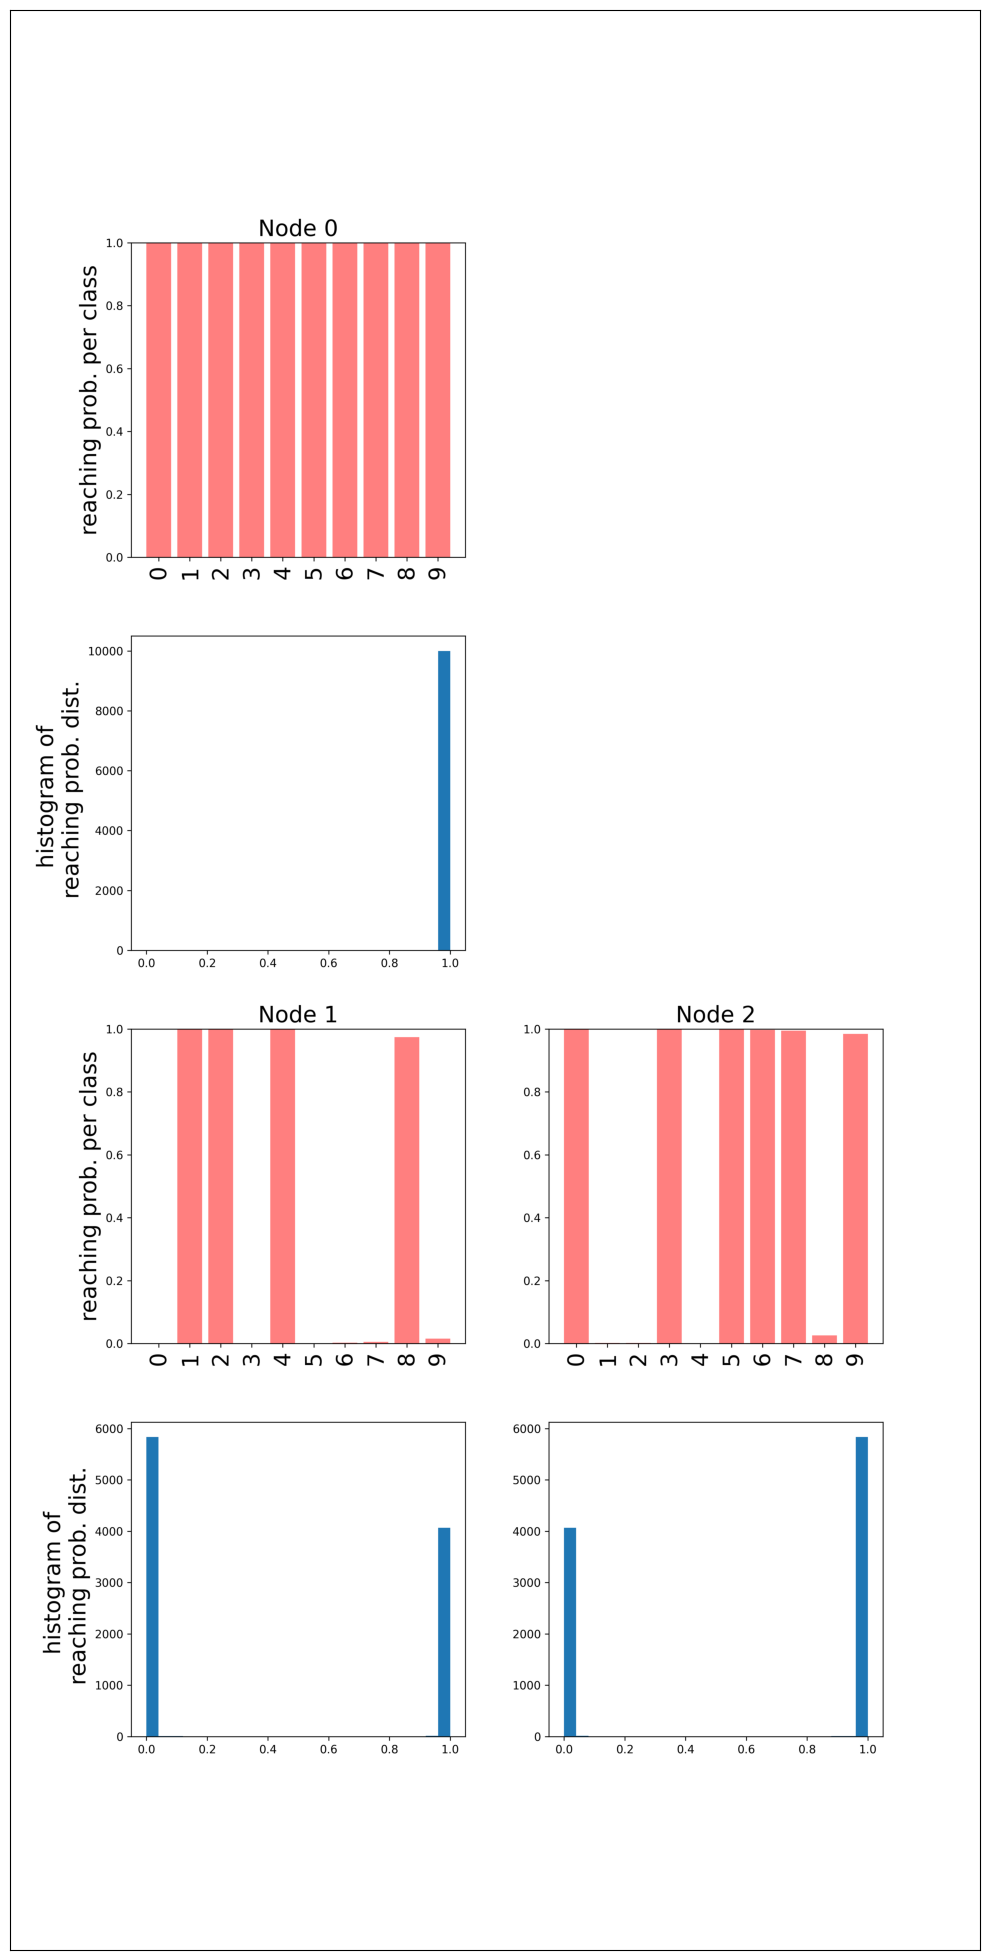

In [5]:
fig_dir = exp_dir + 'run0' + '/figures/'
visualization.visualize_treestructures(fig_dir, figsize=(10,20))

# FLOPs and model size with ptflops

In [5]:
from models import Tree
from utils import load_tree_model

model_path = "/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/fashion_mnist/mbv2light/run0_width_0.5/checkpoints/model.pth"
model = load_tree_model(model_path)
print(model)

Tree(
  (tree_modules): ModuleList(
    (0): Sequential(
      (transform): Root_MBV2light(
        (features): Sequential(
          (0): InvertedResidual(
            (conv): Sequential(
              (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (1): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU6(inplace=True)
              (3): Conv2d(1, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
          )
          (1): InvertedResidual(
            (conv): Sequential(
              (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU6(inplace=True)
              (3): Conv2d(96, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), group

In [6]:
import ptflops

inputres = (1,28,28)
flops, params = ptflops.get_model_complexity_info(model, inputres, as_strings=True, print_per_layer_stat=True)
print('Flops:  ' + flops)
print('Params: ' + params)

Tree(
  282.07 k, 100.000% Params, 5.75 MMac, 100.000% MACs, 
  (tree_modules): ModuleList(
    282.07 k, 100.000% Params, 5.75 MMac, 100.000% MACs, 
    (0): Sequential(
      282.07 k, 100.000% Params, 5.75 MMac, 100.000% MACs, 
      (transform): Root_MBV2light(
        226.49 k, 80.295% Params, 5.74 MMac, 99.935% MACs, 
        (features): Sequential(
          226.49 k, 80.295% Params, 5.74 MMac, 99.935% MACs, 
          (0): InvertedResidual(
            59, 0.021% Params, 47.04 KMac, 0.818% MACs, 
            (conv): Sequential(
              59, 0.021% Params, 47.04 KMac, 0.818% MACs, 
              (0): Conv2d(9, 0.003% Params, 7.06 KMac, 0.123% MACs, 1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (1): BatchNorm2d(2, 0.001% Params, 1.57 KMac, 0.027% MACs, 1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU6(0, 0.000% Params, 784.0 Mac, 0.014% MACs, inplace=True)
              (3): Conv2d(16, 0.006% Para

/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/examples/../models.py:1745: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
